<h1>(QC) Codigo KNN</h1>
<p>Codigo de KNN básico</p>

In [7]:
import pennylane as qml
import matplotlib.pyplot as plt
from pennylane import numpy as np 

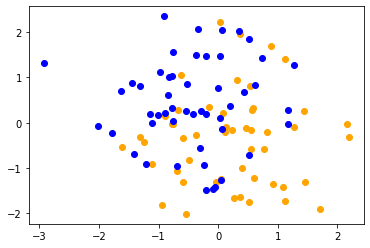

In [8]:
np.random.seed(42)

n_samples = 200

#Datos de entrenamiento
A_train = np.array([[np.random.normal(loc=-0.3), np.random.normal(loc=0.5)] for i in range(n_samples//4)]) 
B_train = np.array([[np.random.normal(loc=0.3), np.random.normal(loc=-0.5)] for i in range(n_samples//4)]) 

train_labels = ["A"] * (n_samples // 4) + ["B"] * (n_samples // 4)

# Datos de test
A_test = np.array([[np.random.normal(loc=-0.3), np.random.normal(loc=0.5)] for i in range(n_samples//4)]) 
B_test = np.array([[np.random.normal(loc=0.3), np.random.normal(loc=-0.5)] for i in range(n_samples//4)]) 

test_labels = ["A"] * (n_samples // 4) + ["B"] * (n_samples // 4)

plt.scatter(B_train[:,0], B_train[:,1], color = "orange")
plt.scatter(A_train[:,0], A_train[:,1], color = "blue")

plt.show()

In [9]:
def featureMap(x,wires):
    qml.RY(x[0],wires[0])
    qml.RY(x[1],wires[1])

In [13]:
dev = qml.device("default.qubit",5)
@qml.qnode(dev)
def swap_test(x1,x2):
    featureMap(x1,wires = [1,2])
    featureMap(x2,wires = [3,4])
    
    qml.Hadamard(0)
    qml.CSWAP(wires = [0,1,3])
    qml.CSWAP(wires = [0,2,4])
    qml.Hadamard(0)
    
    return qml.expval(qml.PauliZ(0))

In [14]:
def distance(x1,x2):
    return 2-2*swap_test(x1,x2)
distance(A_train[0],A_train[1])

tensor(1.09554785, requires_grad=True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3,metric=distance)
neigh.fit(np.concatenate([A_train,B_train]),train_labels)
neigh.score(np.concatenate([A_test,B_test]), test_labels)